# Pymaceuticals Data/ Statistical Analysis

### Dependancies.

In [103]:
# Key Dependancies 
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib as mpl
import pandas as pd
import scipy.stats as st
import numpy as np 
import os 
import csv

# Due to Darkmode of Jupyter Notebook
plt.style.use('dark_background')
mpl.rcParams["figure.facecolor"] = '1c2021'
mpl.rcParams["axes.facecolor"] = '1c2021'

# Version of MPL
print("Matplotlib version: ",mpl.__version__)

# Loading Data Files 
mouse_metadata_path = "data/mouse_metadata.csv"
study_results_path = "data/study_results.csv"

# Reading Files 
mouse_data = pd.read_csv(mouse_metadata_path)
study_data = pd.read_csv(study_results_path)

# Merging Data
comb_data=pd.merge(mouse_data,study_data, how="outer")
comb_data.head()


Matplotlib version:  3.5.1


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


### Preparing Data and Cleaning.

In [104]:
# Number of Unique Mice ID's (n unique)
total_mice=comb_data["Mouse ID"].nunique()
print(f'{total_mice} Mice were used in this study.')

# Duplicate Mice ID's with duplicate timepoints 
dup_mice = comb_data.loc[comb_data.duplicated(subset =["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mice

# Obtaining data for duplicates
comb_data.loc[comb_data["Mouse ID"] =="g989",:]

# New DF removing Duplicate data
clean_data = comb_data[comb_data["Mouse ID"].isin(dup_mice)==False]
clean_data.head()


249 Mice were used in this study.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [105]:
# Validating Data is Clean
total_mice_clean=clean_data["Mouse ID"].nunique()
print(f'{total_mice_clean} Mice were used in this study.')

248 Mice were used in this study.


### Summary Statistics.

In [106]:
# Objective: Creating a stat table of mean, median, variance, stand dev and 
# SEM of tumor volume for each drug 

# Grouping by Drug 
drug_group = clean_data.groupby("Drug Regimen")
# Mean Tumour Volume
tumour_volume_mean = drug_group['Tumor Volume (mm3)'].mean()
# Median Tumour Volume
tumour_volume_median = drug_group['Tumor Volume (mm3)'].median()
# Variance of Tumour Volume
tumour_volume_vari = drug_group['Tumor Volume (mm3)'].var()
# Standard Deviation of Tumour Volume
tumour_volume_dev = drug_group['Tumor Volume (mm3)'].std()
# Unibiased SEM
tumour_volume_sem = drug_group['Tumor Volume (mm3)'].sem()

# Summary Table Data Frame
summary_stats=pd.DataFrame({ 
    'Mean': tumour_volume_mean,
    'Median' : tumour_volume_median,
    'Variance' : tumour_volume_vari,
    'Standard Deviation' : tumour_volume_dev,
    'Standard Error' : tumour_volume_sem})

# Format to 2dp and display
summary_stats.round(2)

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [107]:
drug_group['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### Bar and Pie Charts.

<AxesSubplot:title={'center':'Total Num Timepoints for All Mice for each Drug'}, xlabel='Drug Regimen', ylabel='Total Number of Timepoints'>

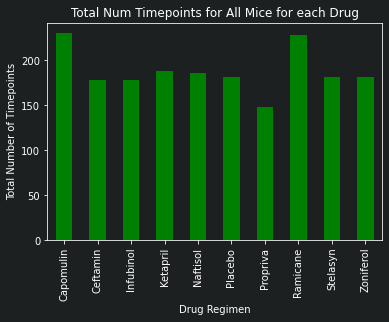

In [108]:
# Bar Plot using Dataframe method showing total timepoints for all mice
# Tested for each drug throughout the study 

drug_group.count()['Timepoint'].plot(kind = 'bar', ylabel = 'Total Number of Timepoints', title = 'Total Num Timepoints for All Mice for each Drug', color = 'green')


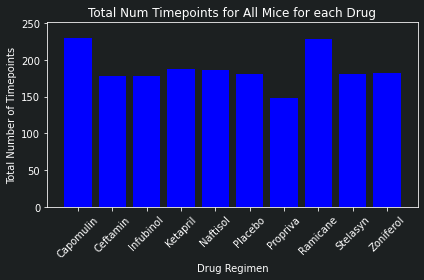

In [109]:
# Bar Plot using Pyplot method showing total timepoints for all mice
# Tested for each drug throughout the study 

# Creating bar chart and stating colour
plt.bar(drug_group.count()['Timepoint'].index, drug_group.count()['Timepoint'], color = 'b')

# Add title and labels for the chart
plt.title("Total Num Timepoints for All Mice for each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")

# Changing angle of index values in x-axis to better represent data
plt.xticks([x for x in range(length)],drug_group.count()['Timepoint'].index,rotation = 45)

# Set the y limits of the current chart
plt.ylim(0, 251)
plt.yticks(np.arange(0,251, 50.0))
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Distribution of Female vs. Male'}, ylabel='Sex'>

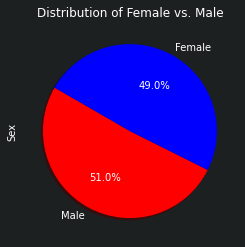

In [110]:
# Pie Plot using Pandas representing gender of mice

count_gender = clean_data['Sex'].value_counts()
count_gender.plot(kind = 'pie', title = 'Distribution of Female vs. Male', colors = ["red", "blue"], autopct='%1.1f%%', startangle = 150, shadow = True)


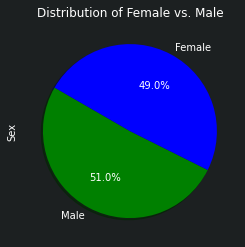

In [111]:
# Pie plot showing the distribution of female versus male mice using pyplot

# Generating Pie Chart
plt.pie(clean_data['Sex'].value_counts(), labels = clean_data['Sex'].unique(),  colors = ["green", "blue"],autopct='%1.1f%%', shadow = True, startangle = 150)



# Labelling Pie Chart
plt.title('Distribution of Female vs. Male')
plt.ylabel('Sex')
plt.show()

### Quartiles, Outliers and Box Plot

In [112]:
# Reprint Clean data
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [113]:
# Caclulate final tumor vvol for each mouse across each treatement

# Calculate greatest timepoint for each mouse, group by mouse ID
mouse_id = clean_data.groupby('Mouse ID')
# Creat new DF
last_timepoint_df = mouse_id.max()
last_timepoint_df.reset_index

# Merging with original DF obtaining tumor vol at last timepoint
tum_vol_df = pd.merge(last_timepoint_df, clean_data, how = 'left', on = ['Mouse ID', 'Timepoint', 'Drug Regimen', 'Tumor Volume (mm3)', 'Age_months', 'Weight (g)', 'Sex' ])
tum_vol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites_x,Metastatic Sites_y
0,a203,Infubinol,Female,20,23,45,67.973419,2,2.0
1,a251,Infubinol,Female,21,25,45,65.525743,1,1.0
2,a262,Placebo,Female,17,29,45,70.717621,4,4.0
3,a275,Ceftamin,Female,20,28,45,62.999356,3,3.0
4,a366,Stelasyn,Female,16,29,30,63.440686,1,1.0
...,...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0,0.0
244,z578,Ramicane,Male,11,16,45,45.000000,0,NaN
245,z581,Infubinol,Female,24,25,45,62.754451,3,3.0
246,z795,Naftisol,Female,13,29,45,65.741070,3,3.0


In [114]:
# Drug Treatments In List for Loop
drug_lst = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Need to create list which can be filled with tumor volume data for plotting
tumorvol_lst = []
lowquart = []
upquart = []
counter = 0

# Note merged DF for tumor volume = tum_vol_df

# For Loop calculating stats (quartiles, upper/lower bounds, IQR)

for drug in drug_lst:

# Looking for rows in which mice are on each drug to find tum volume
    drug_rows = tum_vol_df.loc[tum_vol_df['Drug Regimen'] == drug]
    tumorvol_lst.append(drug_rows)

# Determining Outliers using Bounds, quartiles and drug regimen
    quartiles = drug_rows['Tumor Volume (mm3)'].loc[drug_rows['Drug Regimen'] == drug].quantile([.75, .5, .25])
    upquart.append(quartiles[0.75])
    lowquart.append(quartiles[0.25])
    iqr = upquart[counter] - lowquart[counter]

    upp_bound = upquart - (1.5*iqr)
    low_bound = lowquart - (1.5*iqr)

# Printing Results
    print(f'{drug} IQR:')
    print(f'The lower quartile of {drug} is {lowquart[counter].round(2)}')
    print(f'The upper quartile of {drug} is {upquart[counter].round(2)}')
    print(f'The interquartile range of {drug} is {iqr.round(2)}')
    print(f'Values below {lowquart[counter]} for {drug} can be outliers.')
    print(f'Values above {upquart[counter]} for {drug} can be outliers.')
    print(f'---------------------------------------------------------------')

    counter += 1
   



Capomulin IQR:
The lower quartile of Capomulin is 45.0
The upper quartile of Capomulin is 46.75
The interquartile range of Capomulin is 1.75
Values below 45.0 for Capomulin can be outliers.
Values above 46.74900552 for Capomulin can be outliers.
---------------------------------------------------------------
Ramicane IQR:
The lower quartile of Ramicane is 45.0
The upper quartile of Ramicane is 46.34
The interquartile range of Ramicane is 1.34
Values below 45.0 for Ramicane can be outliers.
Values above 46.34383237 for Ramicane can be outliers.
---------------------------------------------------------------
Infubinol IQR:
The lower quartile of Infubinol is 54.05
The upper quartile of Infubinol is 65.53
The interquartile range of Infubinol is 11.48
Values below 54.04860769 for Infubinol can be outliers.
Values above 65.52574285 for Infubinol can be outliers.
---------------------------------------------------------------
Ceftamin IQR:
The lower quartile of Ceftamin is 48.72
The upper qua

<AxesSubplot:title={'center':'Tumor Volume Across Four Drugs of Interest'}, ylabel='Tumor Volume(mm3)'>

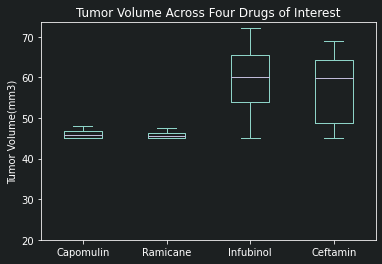

In [117]:
# Box Plot of Final Tumor Volume for each Drug regimen

# Obtaining Data to Plot from DF
box_plot_data = pd.DataFrame({drug_lst[0]:tumorvol_lst[0]['Tumor Volume (mm3)'],drug_lst[1]: tumorvol_lst[1]['Tumor Volume (mm3)'], drug_lst[2]:tumorvol_lst[2]['Tumor Volume (mm3)'], drug_lst[3]:tumorvol_lst[3]['Tumor Volume (mm3)']})

# Plotting BoxPlot
box_plot_data.plot(kind = 'box',ylim = 20, notch = 0, sym = 'gD', title = 'Tumor Volume Across Four Drugs of Interest', ylabel = 'Tumor Volume(mm3)')



### Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

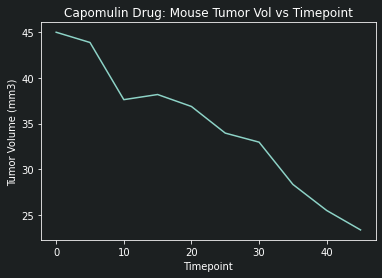

In [126]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Creating DF to obtain Mouse information

linedf = clean_data.loc[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == 's185')]

# Plotting and Formattting 

plt.plot(linedf['Timepoint'], linedf['Tumor Volume (mm3)'])
plt.title('Capomulin Drug: Mouse Tumor Vol vs Timepoint')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')


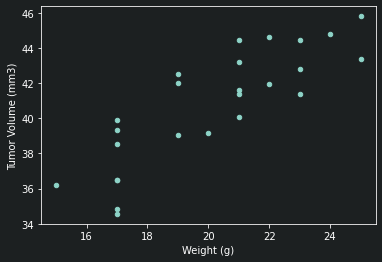

In [129]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_data = clean_data.loc[(clean_data['Drug Regimen'] == 'Capomulin')]
volume_data = capomulin_data.groupby("Mouse ID")[['Weight (g)', 'Tumor Volume (mm3)']].mean()

volume_data.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')

plt.show()


The r-squared is: 0.7088568047708723


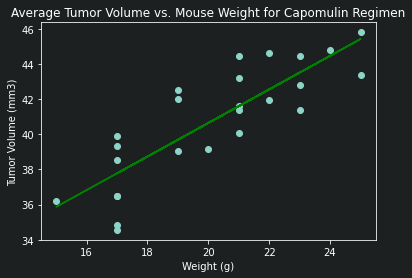

In [142]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight = volume_data['Weight (g)']
volume = volume_data['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, volume)

regress_values = weight  * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, volume)
plt.plot(weight,regress_values,"g-")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [151]:
correlation = st.pearsonr(weight, volume)
#print(f"The correlation between both factors is {correlation}. \n The linear regression equation is {line_eq}."

print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}. \nThe linear regression equation is {line_eq}.")

The correlation between mouse weight and average tumor volume is 0.84. 
The linear regression equation is y = 0.95x + 21.55.
